### **Decorators**

Decorators are functions used to modify other functions, that is allowing the user to add new functionality to an existing object without modifying its structure. 

Let's start from an example of function that has another function as an argument:

In [1]:
def change_sign(f,x):
    return -f(x)

def my_f(x):
    return 7*x

x=3
print(change_sign(my_f,x))

-21


What if the we have more than one argument?

In [3]:
def change_sign(f,*args, **kwargs): #kwargs stands for keyword arguments
    return -f(*args, **kwargs)

def product(x,y):
    return x*y

y=4

print(change_sign(my_f,x))
print(change_sign(product,x,y))

-21
-12


This is a bit ugly though. Let's make the `change_sign` function return a function rather than the output. To do this, we need to create another, wrapping function inside `change_sign`.

In [4]:
def change_sign(f):
    def wrapper(*args, **kwargs):
        return -f(*args, **kwargs)
    return wrapper

minus_my_f = change_sign(my_f)

print(minus_my_f(x))


-21


Now we have a function that will modify any function to output the opposite sign value. However, we probably woudln't want to have to redefine all the functions we might need to use the change sign on. That's where decorator syntax comes in:

In [5]:
def change_sign(func):
    def wrapper(*args, **kwargs):
        return -func(*args, **kwargs)
    return wrapper

@change_sign
def my_f(x):
    return 7*x

@change_sign
def product(x,y):
    return x*y

print(my_f(x))
print(product(x,y))


-21
-12


The only problem we have now concerns the help:

In [6]:
help(my_f)
help(product)

Help on function wrapper in module __main__:

wrapper(*args, **kwargs)

Help on function wrapper in module __main__:

wrapper(*args, **kwargs)



We can fix this by using a decorator from the functools package

In [7]:
import functools

def change_sign(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        return -func(*args, **kwargs)
    return wrapper

@change_sign
def my_f(x):
    "hjhjhj"
    return 7*x

@change_sign
def product(x,y):
    return x*y

help(my_f)
help(product)


Help on function my_f in module __main__:

my_f(x)
    hjhjhj

Help on function product in module __main__:

product(x, y)



Here is one very useful example of the use of the decorators:

In [8]:
debug_flag = True

def debug(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        if debug_flag:
            arguments = [f"{a}" for a in args]
            karguments = [f"{k}={v}" for k,v in kwargs.items()]
            name = func.__name__
            print("Calling "+name+" with args: "+", ".join(arguments)+" and kwargs: "+", ".join(karguments))
            value = func(*args, **kwargs)
            print("Run function: "+name+", which output: "+repr(value))
            return value
        else:
            return func(*args, **kwargs)
    return wrapper

@debug
def my_f(x, y=2):
    return 7*x

print(my_f(2,8))

Calling my_f with args: 2, 8 and kwargs: 
Run function: my_f, which output: 14
14


#### Exercise 5.1:

Create a decorator that checks if the passed array is empty and only calls the function if it's not.



In [12]:
import numpy as np

In [24]:
import functools

def is_empty(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        for a in args:
            if len(a) == 0:
                return 
        return func(*args, **kwargs) 
    return wrapper
    
@is_empty
def my_func (x):
    return x

In [26]:
a = []
b = [1, 2, []]
c = [1]
my_func (b)

[1, 2, []]

#### Exercise 5.2:

Create a decorator to time a function execution time. Hint: use `import time` and `time_point=time.time()`. You can check if it's correct by timing the `time.sleep` function.


In [55]:
import time

In [34]:
time.sleep(5)

In [72]:
import functools
def time_execution(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        t1 = time.time()
        value = func(*args, **kwargs)
        t2 = time.time()
        print('start:',t1,'\n', 'end:',t2, '\n', 'duration:',t2-t1)
        return value
    return wrapper
    
@time_execution
def sleeping(t):
    return time.sleep(t)

In [73]:
sleeping(5)

start: 1768321262.0484085 
 end: 1768321267.0487227 
 duration: 5.000314235687256


#### Exercise 5.3:

Write a decorator that plots a function (of one variable) over the interval (0,100). Make sure your plot has a name, the axis names, nice color, changed background color and a legend.


In [140]:
import matplotlib.pyplot as plt
def plottin(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        y = func(*args, **kwargs)
        
        plt.figure(figsize=(9, 5))
        with plt.style.context(('ggplot')):
            plt.plot(*args, y, label='Kohler curve')
            plt.xlabel('Droplet radius $r$')
            plt.ylabel('Saturation ratio $S$')
            plt.legend()
    return wrapper
    
@ plottin 
def f(x):
    return np.exp(0.1/(0.4*x)) * (1 - 0.5/x**3)

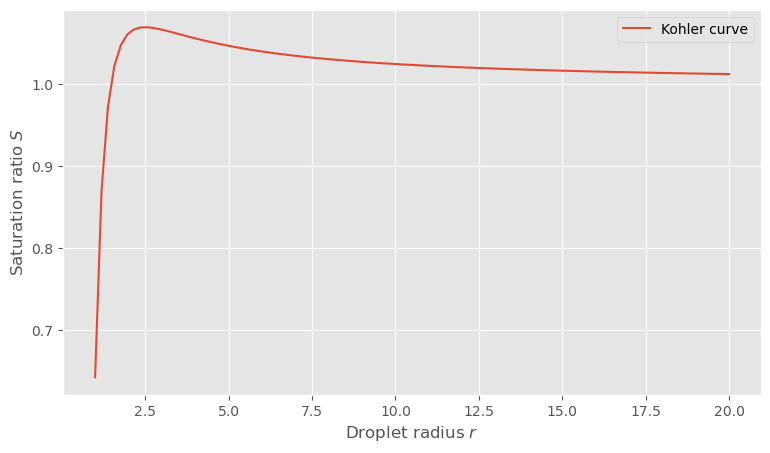

In [141]:
x = np.linspace(1, 20,100)
f(x)